# 1. To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

1. Import data into Python environment.
2. Provide the trend chart for the number of complaints at monthly and daily granularity levels.
3. Provide a table with the frequency of complaint types.

In [14]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
from bs4 import BeautifulSoup as bs
from scipy import stats
import sklearn

### 1) 1) Import data into Python environment

In [15]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [16]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [17]:
df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [18]:
df.shape

(2224, 11)

In [19]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [20]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

### 1) 2) Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [55]:
df['Month']=pd.to_datetime(df['Date_month_year']).dt.month_name()
df['Date']=pd.to_datetime(df['Date_month_year']).dt.day

In [56]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                    int64
Month                                  object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [57]:
df

,Ticket #,Customer Complaint,Date,Month,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22,April,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4,August,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18,April,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5,July,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26,May,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,4,February,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,6,February,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,6,September,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23,June,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


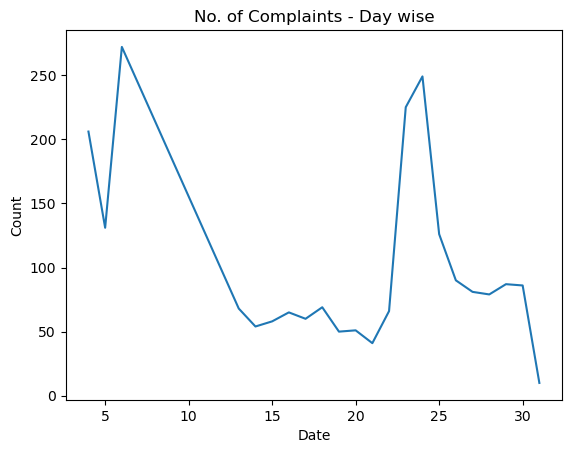

In [67]:
df.groupby(['Date'])['Customer Complaint'].count().plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('No. of Complaints - Day wise')
plt.show()

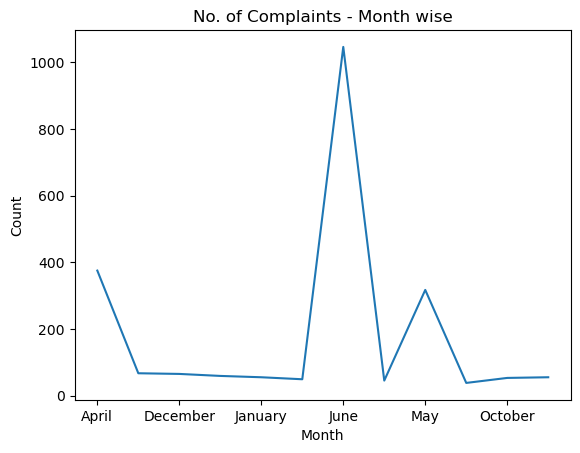

In [69]:
df.groupby(['Month'])['Customer Complaint'].count().plot()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('No. of Complaints - Month wise')
plt.show()

### 1) 3) Provide a table with the frequency of complaint types

In [79]:
df['Customer Complaint'].value_counts().to_frame().reset_index()

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


# 2. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
1. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
2. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

### 2) 1) Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [100]:
def func(x):
    if x=='Open': 
        return 'Open'
    elif x=='Pending':
        return 'Open'
    else:
        return 'Closed'

In [101]:
df['Status Type']=df['Status'].apply(func)

In [104]:
df['Status Type'].to_frame()

,Status Type
0,Closed
1,Closed
2,Closed
3,Open
4,Closed
...,...
2219,Closed
2220,Closed
2221,Closed
2222,Closed


### 2) 2) Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

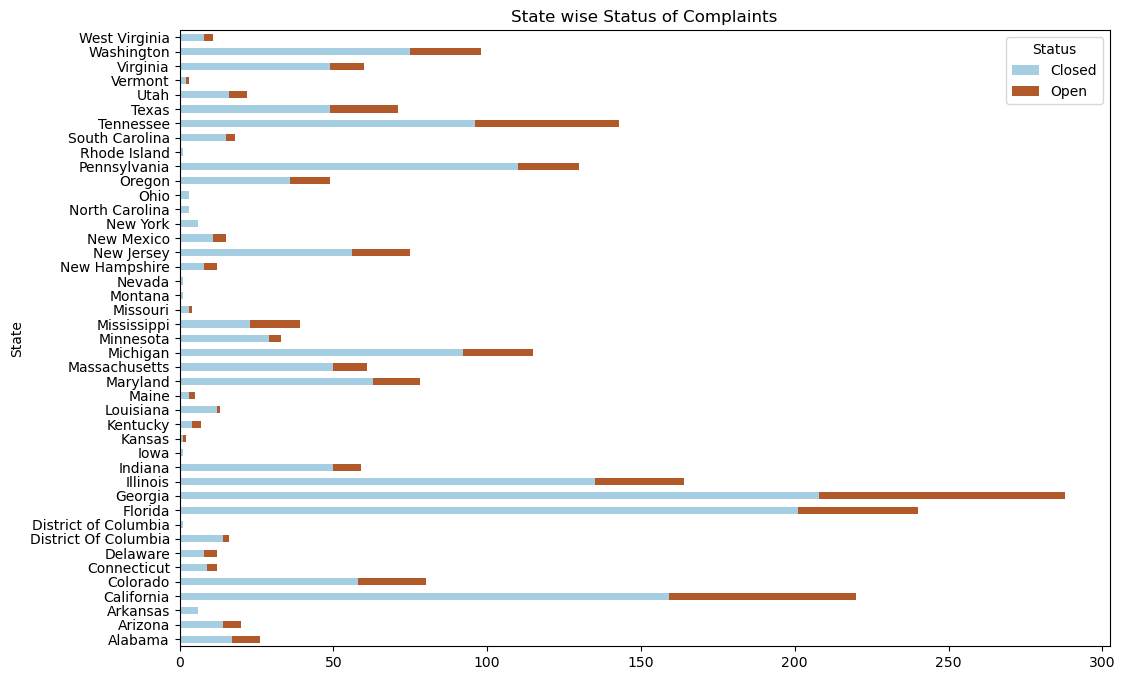

In [109]:
crosstab=pd.crosstab(index=df['State'],columns=df['Status'])
crosstab.plot(kind='barh',figsize=(12,8),stacked=True,colormap='Paired')
plt.title('State wise Status of Complaints')
plt.show()

# 3. Which state has the maximum complaints

In [141]:
df.groupby('State')['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

# 4. Which state has the highest percentage of unresolved complaints
1. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [145]:
State_Unsolved = df.loc[df['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State  
Georgia    15.473888
dtype: float64

### 4) 1) Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [146]:
df[df['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    50.615114
        Internet              49.384886
Name: Received Via, dtype: float64